# Lecture 7 - 23/04/2024

## Last week recap

We have noticed the following properties:
- denser enviroments have more passive galaxies;
- at fixed densities, low mass galaxies are more likely to be active.

Putting the two together, we reach the conclusion that galaxies are more likely to be passive if they are more massive and/or live in a denser enviroment.

## This week's activity
To conduct these two studies we used:
- photometry, to obtain stellar mass, SFR and dust attenuation;
- galaxy position, to gìobtain enviromental density.

But SDSS is also a spectroscopic survey, in particular it provides galaxy spectra in the optical wavelength range. Using these spectra, in principle we can derive:
- metallicity,
- temperature of ionized gas,
- SFR*,
- galaxy kinematics*.

The issue with these last two measurements (*) is that SDSS fixes its optical fiber only on the centre of the galaxy: we can't compare them to our previous measures of SFR as they were total ones, while these consider only a part of the galaxy. The same is true for galaxy kinematics: we only get the Z of the centre of the galaxy and we can't map the entire galaxy rotation. We could measure both the total SFR and the rotation only if we were to build a different instrument with many optical fibers (integral field spectroscopy) which would get us the whole galaxy spectrum. This is in fact done, but only for a smaller number of galaxies compared to the entirety of the SDSS catalogue.

### Metallicity
Metallicity is defined as the amount of heavy elements (more massive than helium) in the galaxy. It can be given in different units, for example in units of $12 + log(\frac{O}{H})$, which for the Sun is equal to 8.69. This is usually a small number as hydrogen is much more prevalent than oxygen and it can go down to -4, in systems where only helium and hydrogen exist. Another unit is Z (mass fraction of metals), where X + Y + Z = 1 (X = mass fraction of H, Y = mass fraction of He). The solar value is Z$_\odot$ = 0.02.

Metallicity could be in principle obtained by summing up all the emission lines and dividing by the flux, but in reality we use calibration: we only observe a few lines and transform them into a metallicity value. Different calibration exist and can lead to different metalliciy values.

![](met1.jpg)


But even given a calibration method, the conversion is not always a function: we could have more branches, leading to multiple met. values from the same lines and flux. Metallicity calibration also depends on a number of factors, including gas ionization state, and the spectrum of the ionizing source (+ the emission line fluxes need to be intrinsic, i.e. corrected for dust attenuation).

![](met2.jpg)

SDSS gives a metallicity estimates (using a Bayesian method than combines multiple calibrations) and we can study how it relates to other properties.

### Ionizing sources
We said that the SDSS spectra comes from the centre of the galaxies. But what are the sources that could ionize gas in this region? We have two possibilities: **AGNs or massive stars**. We have to understand how to distinguish the two from the spectrum.

![](spectrum.jpg)

In the plot, the younger stars are on top and it goes up until UV, meaning very energetic photons. The red line represents an ideal quasar spectrum, which keeps rising at high energies, while the stellar spectrum ends before.

If we compare emission lines spectra, we can notice that it's very hard for stars to emit forbidden lines, such as [OIII] (second ionization of oxygen)or [NII]. This is because forbidden lines are collision-powered and we only have enough collisions when high energy photons create higher velocity electrons. This only happens at high temperatures: collisions become more efficient and forbidden lines are more likely to be produced. This means not only that these are indicators of temperature but also of the presence of an AGN!

By taking the ratio of forbidden lines with H$_\alpha$ and H$_\beta$ two population arise: stellar and AGN driven, which are distinguished with a known separation line. 

These line ratios also weakly depend on metallicity, meaning they are not ideal for a more precise study, where we would have to take into account the different degeneracies that arise.

### Activity
- can we relate AGN presence with other properties?
- how does metallicity correlate with other processes?

# Coding

We want to plot on the x axis $log(\frac{[NII]}{H_\alpha})$ and on the y $log(\frac{[OIII]}{H_\beta})$. Before doing that, we cut galaxies which have too high of a signal-to-noise ratio ($\geq$ 5, defined as the ratio between one line and the error on it). We also plot the separation line between stellar and AGN.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from scipy import stats
import tqdm

In [20]:
SDSS_ph = Table.read('SDSS_LAB2024_CIGALEresults.fits') #SDSS photometry results
SDSS_sp = Table.read('SDSS_LAB2024_spectroscopy.fits') #SDSS spectroscopy results

In [49]:
init_ph_data = np.array(SDSS_ph)
init_sp_data = np.array(SDSS_sp)

In [50]:
#EXECUTE FOR COLUMN NAMES AND INDECES
for i in range(len(init_ph_data[0])):
    if i < len(init_sp_data[0]):
        print(i, SDSS_ph.colnames[i], '\n ', SDSS_sp.colnames[i])
    else: print(i, SDSS_ph.colnames[i])

0 id 
  id
1 bayes_attenuation_E_BVs_stellar_young 
  Ra
2 bayes_attenuation_E_BVs_stellar_young_err 
  Dec
3 bayes_sfh_age 
  SpecObjID
4 bayes_sfh_age_err 
  oii_3726_flux
5 bayes_sfh_tau_main 
  oii_3726_flux_err
6 bayes_sfh_tau_main_err 
  oii_3729_flux
7 bayes_sfh_sfr 
  oii_3729_flux_err
8 bayes_sfh_sfr_err 
  h_beta_flux
9 bayes_stellar_m_star 
  h_beta_flux_err
10 bayes_stellar_m_star_err 
  oiii_5007_flux
11 best_chi_square 
  oiii_5007_flux_err
12 best_reduced_chi_square 
  h_alpha_flux
13 best_attenuation_E_BVs_stellar_old 
  h_alpha_flux_err
14 best_sfh_age 
  nii_6584_flux
15 best_sfh_tau_main 
  nii_6584_flux_err
16 best_stellar_imf 
  sii_6717_flux
17 best_stellar_metallicity 
  sii_6717_flux_err
18 best_universe_age 
  sii_6731_flux
19 best_universe_redshift 
  sii_6731_flux_err
20 best_sfh_sfr 
  log_oh
21 best_stellar_m_star
22 best_sdss_up
23 best_sdss_gp
24 best_sdss_rp
25 best_sdss_ip
26 best_sdss_zp


In [51]:
invalid_index = []
for i in range(len(init_sp_data)):
    for j in range(4, 19, 2):       #emission lines data go from index 4 to 19, the even indexes are the values while the odd ones are the errors
        if init_sp_data[i][j]/init_sp_data[i][j+1] <= 5:
            invalid_index.append(i)
            break

In [52]:
print(len(invalid_index))
print(len(init_sp_data))
ph_data = np.delete(init_ph_data, invalid_index)
sp_data = np.delete(init_sp_data, invalid_index)
print(len(ph_data))

58453
92483
34030


In [53]:
x_data = [np.log10(sp_data[i][14]/ sp_data[i][12]) for i in range(len(sp_data))]
y_data = [np.log10(sp_data[i][10]/sp_data[i][8]) for i in range(len(sp_data))]

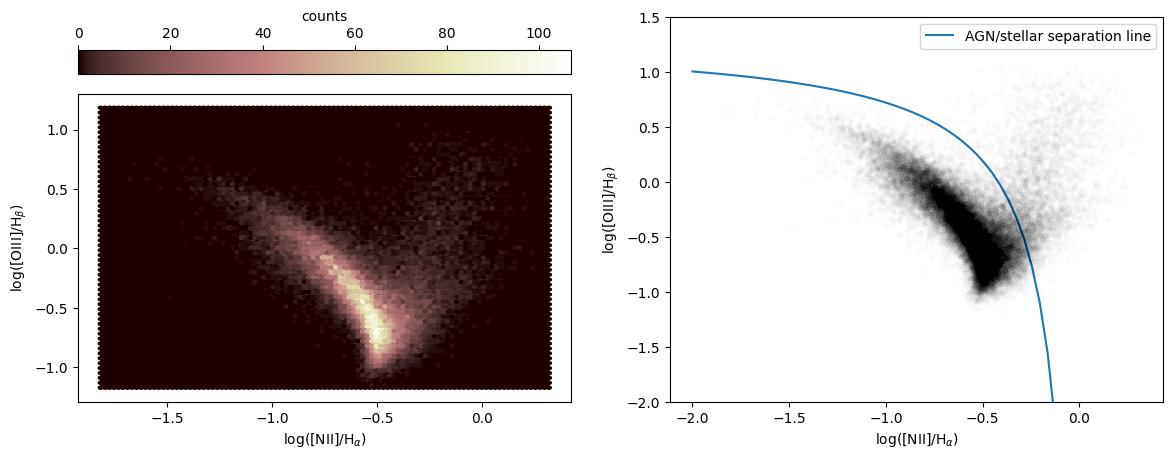

In [54]:
fig = plt.figure(figsize = (14, 5))
fig.tight_layout(pad=6)
ax = fig.add_subplot(121)
hexbin = ax.hexbin(x_data, y_data, cmap = 'pink')
ax.set(xlabel = 'log([NII]/H$_\\alpha$)', ylabel = 'log([OIII]/H$_\\beta$)')
fig.colorbar(hexbin, label='counts', location = 'top')

ax = fig.add_subplot(122)
x_line = np.linspace(-2, 0)
s_line = 0.61/ (x_line - 0.05) + 1.3
ax.plot(x_line, s_line, label='AGN/stellar separation line')
ax.plot(x_data, y_data, ".", alpha = 0.01, color = 'black')
ax.set(xlabel = 'log([NII]/H$_\\alpha$)', ylabel = 'log([OIII]/H$_\\beta$)', ylim = [-2, 1.5])
ax.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

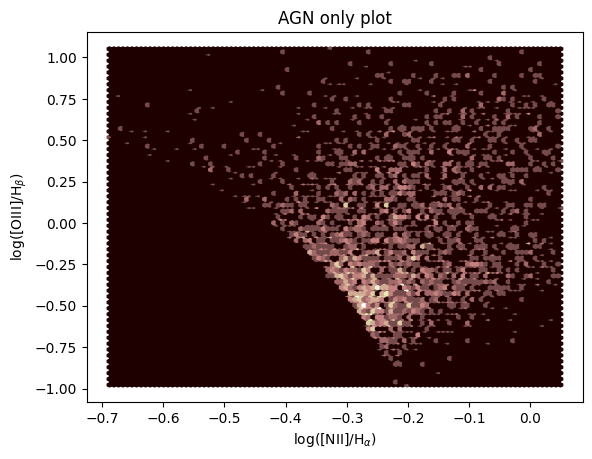

In [55]:
separation_line = [0.61/ (x - 0.05) + 1.3 for x in x_data]
AGN_index = []
stellar_index = []

for i in range(len(x_data)):
    if (y_data[i] >= separation_line[i]):
        AGN_index.append(i)
    else:
        stellar_index.append(i)
        
AGN_x = np.delete(x_data, stellar_index)
AGN_y = np.delete(y_data, stellar_index)
plt.hexbin(AGN_x, AGN_y, cmap = 'pink')
plt.title('AGN only plot')
plt.xlabel ('log([NII]/H$_\\alpha$)')
plt.ylabel ('log([OIII]/H$_\\beta$)')
plt.show

Now that we can distinguish which galaxies have an AGN and which don't, we can study other properties and see how the presence of an AGN influence them.

In [56]:
stellar_mass = np.array(SDSS_ph['best_stellar_m_star'])
sfr1 = np.array(SDSS_ph['bayes_sfh_sfr'])

In [57]:
#Deleting galaxies with high SNR
s_mass = np.delete(stellar_mass, invalid_index)
sfr = np.delete(sfr1, invalid_index)

In [58]:
#Dividing between stellar and AGN
stellar_smass = np.delete(s_mass, AGN_index)
stellar_sfr = np.delete(sfr, AGN_index)
AGN_mass = np.delete(s_mass, stellar_index)
AGN_sfr = np.delete(sfr, stellar_index)

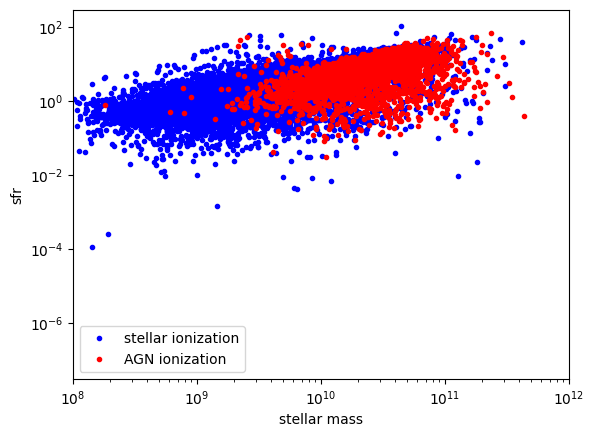

In [59]:
plt.plot(stellar_smass, stellar_sfr, '.', color = 'blue', label = 'stellar ionization')
plt.plot(AGN_mass, AGN_sfr, '.', color = 'red', label= 'AGN ionization')
plt.xlabel('stellar mass')
plt.xlim([1E+8, 1E+12])
plt.ylabel('sfr')
plt.legend()
plt.loglog()
plt.show()

In [60]:
age1 = np.array(SDSS_ph['best_sfh_age'])

In [61]:
age = np.delete(age1, invalid_index)
stellar_age = np.delete(age, AGN_index)
AGN_age = np.delete(age, stellar_index)

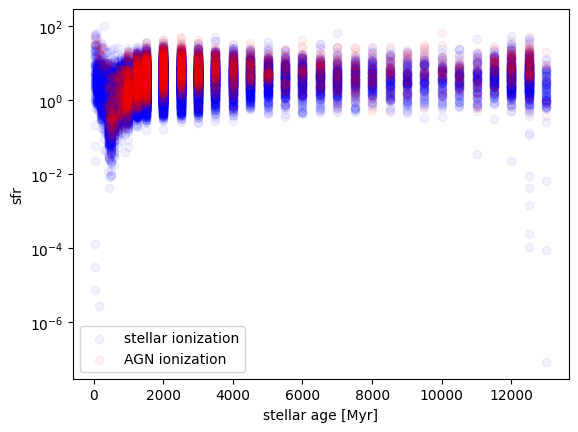

In [62]:
plt.scatter(stellar_age, stellar_sfr, color = 'blue', label = 'stellar ionization', alpha = 0.05)
plt.scatter(AGN_age, AGN_sfr, color = 'red', label= 'AGN ionization', alpha = 0.05)
plt.xlabel('stellar age [Myr]')
plt.ylabel('sfr')
plt.legend()
plt.semilogy()
plt.show()

Finally, let's compare our results with the enviroment densities.

In [63]:
SDSS_dens = Table.read('SDSS_env.fits')
init_dens = np.array(SDSS_dens)
density_values = [init_dens[i][1] for i in range(len(init_dens))]

In [64]:
print(max(density_values))

132.41691265245692


[]

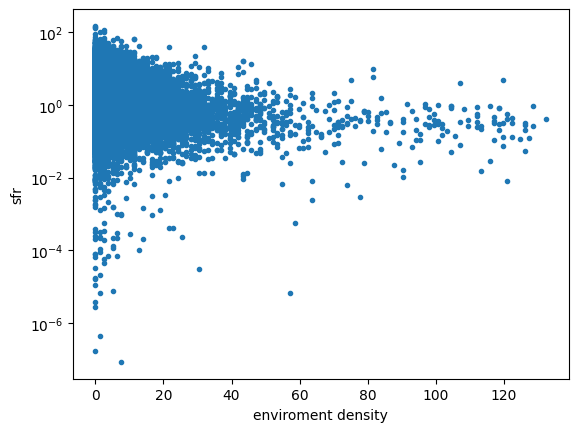

In [65]:
plt.plot(density_values, sfr1,  '.')
plt.xlabel('enviroment density')
plt.ylabel('sfr')
plt.semilogy()

In [66]:
low_d = []
high_d = []

for i in range(len(density_values)):
    if density_values[i] > 0:
        high_d.append(i)
    else: low_d.append(i)

low_d_mass = np.delete(stellar_mass, high_d)
low_d_sfr = np.delete(sfr1, high_d)
high_d_mass = np.delete(stellar_mass, low_d)
high_d_sfr = np.delete(sfr1, low_d)

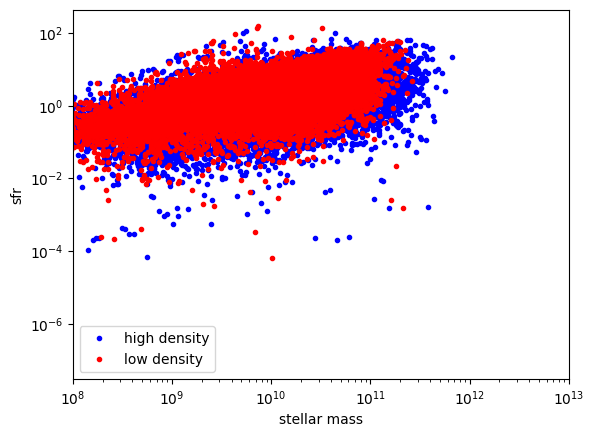

In [67]:
plt.plot(high_d_mass, high_d_sfr, '.', color = 'blue', label='high density')
plt.plot(low_d_mass, low_d_sfr, '.', color = 'red', label = 'low density')
plt.xlim([1E+8, 1E+13])
plt.loglog()
plt.xlabel('stellar mass')
plt.ylabel('sfr')
plt.legend()
plt.show()

# Lecture 8

In particular, we could study the mean of the sSFR of galaxies with and without AGNs and see if they're significantly different. We can also repeat this process at different mass.

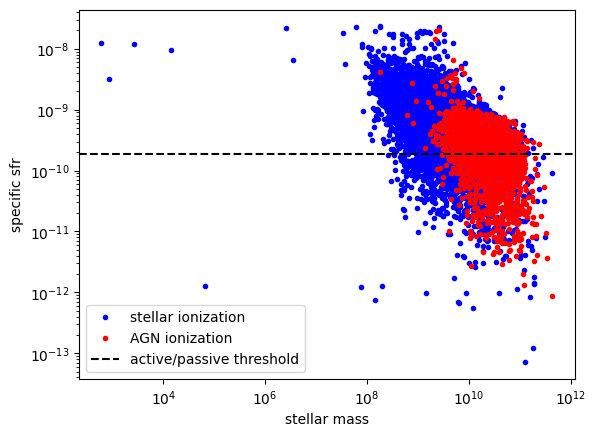

In [68]:
plt.plot(stellar_smass, stellar_sfr/stellar_smass, '.', color = 'blue', label = 'stellar ionization')
plt.plot(AGN_mass, AGN_sfr/AGN_mass, '.', color = 'red', label= 'AGN ionization')
plt.axhline(y = 10**(-9.73), color = 'black', label = 'active/passive threshold', linestyle = '--')
plt.xlabel('stellar mass')
#plt.xlim([1E+8, 1E+12])
plt.ylabel('specific sfr')
plt.legend()
plt.loglog()
plt.show()

In [71]:
low_mass_limit = 10 ** 10

stellar_ssfr = []
AGN_ssfr = []

for i in range(len(stellar_smass)):
    if stellar_smass[i] > low_mass_limit:
        stellar_ssfr.append(stellar_sfr[i] / stellar_smass[i])
for i in range(len(AGN_mass)):
    if AGN_mass[i] > low_mass_limit:
        AGN_ssfr.append(AGN_sfr[i]/AGN_mass[i])

print('agn mean ssfr: ', np.mean(AGN_ssfr), ' +/- ', np.std(AGN_ssfr), '\nno agn mean ssfr: ', np.mean(stellar_ssfr), ' +/- ', np.std(stellar_ssfr))
print('agn median ssfr: ', np.median(AGN_ssfr), 'no agn median ssfr: ', np.median(stellar_ssfr))

agn mean ssfr:  2.779698711546611e-10  +/-  1.9555893730981868e-10 
no agn mean ssfr:  4.2740069545281737e-10  +/-  2.2717848773120357e-10
agn median ssfr:  2.4754060453017435e-10 no agn median ssfr:  4.1359829712448225e-10


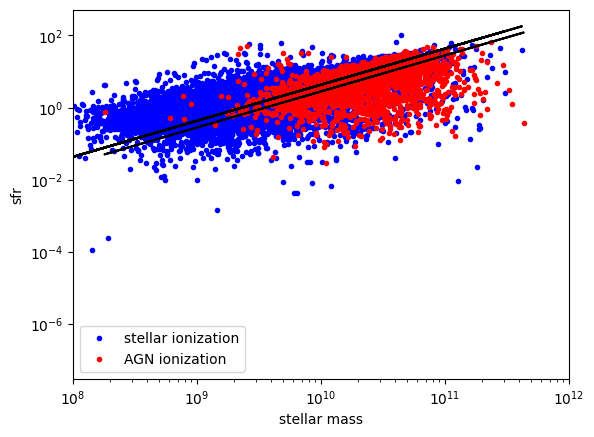

In [70]:
plt.plot(stellar_smass, stellar_sfr, '.', color = 'blue', label = 'stellar ionization')
plt.plot(AGN_mass, AGN_sfr, '.', color = 'red', label= 'AGN ionization')
plt.plot(AGN_mass, np.mean(AGN_ssfr) * AGN_mass, color = 'black')
plt.plot(stellar_smass, np.mean(stellar_ssfr) * stellar_smass, color = 'black')
plt.xlabel('stellar mass')
plt.xlim([1E+8, 1E+12])
plt.ylabel('sfr')
plt.legend()
plt.loglog()
plt.show()

We seem to have found that AGN presence doesn't affect the sSFR, but maybe we could relate AGN presence with the mass/age of the galaxy.